In [124]:
import math
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import NJODE.data_utils as data_util
import NJODE.train as train

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [4]:
dataset_dic = {
    'volatility': np.array([[0.05, 0.0, 0.0], [0.0, 0.1, 0.0], [0.0,0.0, 0.2]]).tolist(),
    'mean': np.array([1, 0.5, 0.5]).tolist(),
    'poisson_lambda': 3.0,
    'speed': np.array([[10, 0.0, 0.0], [0.0, 0.4, 0.0],[0.0,0.0,0.5]]).tolist(),
    'correlation': 0.5,
    'nb_paths': 100,
    'nb_steps': 100,
    'S0': np.array([1.0, 1.5 ,2.0]).tolist(),
    'maturity': 1.0,
    'dimension': 3,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'return_vol': False,
    'v0': 1,
    'hurst': 0.75,
    'FBMmethod': 'daviesharte',
    'model_name': 'OrnsteinUhlenbeckWithCrossTerms',
    'dt': 0.01, 
}

In [5]:
datasetpath, dataset_id = data_util.create_dataset("OrnsteinUhlenbeckWithCrossTerms",dataset_dic)

In [6]:
dataset_id

38

In [7]:
train.train(dataset="OrnsteinUhlenbeckWithCrossTerms", dataset_id=38, data_dict=dataset_dic, use_cond_exp = False)

{'FBMmethod': 'daviesharte', 'S0': [1.0, 1.5, 2.0], 'correlation': 0.5, 'dimension': 3, 'dt': 0.01, 'hurst': 0.75, 'maturity': 1.0, 'mean': [1.0, 0.5, 0.5], 'model_name': 'OrnsteinUhlenbeckWithCrossTerms', 'nb_paths': 100, 'nb_steps': 100, 'obs_perc': 1.0, 'poisson_lambda': 3.0, 'return_vol': False, 'scheme': 'euler', 'speed': [[10.0, 0.0, 0.0], [0.0, 0.4, 0.0], [0.0, 0.0, 0.5]], 'v0': 1, 'volatility': [[0.05, 0.0, 0.0], [0.0, 0.1, 0.0], [0.0, 0.0, 0.2]]}
using loss: standard
neuralODE use input scaling with tanh
use residual network: input_size=9, output_size=10
use residual network: input_size=10, output_size=9
model-id: None

using CPU
input_coords: [0 1 2 3 4 5 6 7 8]
output_coords: [0 1 2 3 4 5 6 7 8]
input_size: 9
output_size: 9
signature_coords: [0 1 2 3 4 5 6 7 8]
new model_id=28
model params:
{"batch_size": 100, "bias": true, "data_dict": {"FBMmethod": "daviesharte", "S0": [1.0, 1.5, 2.0], "correlation": 0.5, "dimension": 3, "dt": 0.01, "hurst": 0.75, "maturity": 1.0, "mean": 

1it [00:00,  5.89it/s]


evaluating ...
epoch 1, weight=0.50000, train-loss=9.31770, optimal-val-loss=nan, val-loss=2.27129, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1030: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)
C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 2.27129
save model ...
saved!
save new best model: last-best-loss: inf, new-best-loss: 2.27129, epoch: 1
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  2.33it/s]


evaluating ...
epoch 2, weight=0.50000, train-loss=7.39892, optimal-val-loss=nan, val-loss=0.90812, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.90812
save model ...
saved!
save new best model: last-best-loss: 2.27129, new-best-loss: 0.90812, epoch: 2
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.67it/s]


evaluating ...
epoch 3, weight=0.50000, train-loss=5.92530, optimal-val-loss=nan, val-loss=0.21056, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.21056
save model ...
saved!
save new best model: last-best-loss: 0.90812, new-best-loss: 0.21056, epoch: 3
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.64it/s]


evaluating ...
epoch 4, weight=0.50000, train-loss=5.09022, optimal-val-loss=nan, val-loss=0.05301, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.05301
save model ...
saved!
save new best model: last-best-loss: 0.21056, new-best-loss: 0.05301, epoch: 4
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.83it/s]


evaluating ...
epoch 5, weight=0.50000, train-loss=4.73081, optimal-val-loss=nan, val-loss=0.22891, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.22891
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.69it/s]


evaluating ...
epoch 6, weight=0.50000, train-loss=4.86322, optimal-val-loss=nan, val-loss=0.50106, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.50106
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.48it/s]


evaluating ...
epoch 7, weight=0.50000, train-loss=5.02524, optimal-val-loss=nan, val-loss=0.70000, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.70000
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.73it/s]


evaluating ...
epoch 8, weight=0.50000, train-loss=5.02220, optimal-val-loss=nan, val-loss=0.76055, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.76055
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.92it/s]


evaluating ...
epoch 9, weight=0.50000, train-loss=4.97166, optimal-val-loss=nan, val-loss=0.69379, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.69379
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.82it/s]


evaluating ...
epoch 10, weight=0.50000, train-loss=4.79047, optimal-val-loss=nan, val-loss=0.54612, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.54612
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.67it/s]


evaluating ...
epoch 11, weight=0.50000, train-loss=4.49020, optimal-val-loss=nan, val-loss=0.36880, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.36880
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.33it/s]


evaluating ...
epoch 12, weight=0.50000, train-loss=4.13481, optimal-val-loss=nan, val-loss=0.20660, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.20660
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.18it/s]


evaluating ...
epoch 13, weight=0.50000, train-loss=3.84597, optimal-val-loss=nan, val-loss=0.08905, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.08905
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.79it/s]


evaluating ...
epoch 14, weight=0.50000, train-loss=3.58103, optimal-val-loss=nan, val-loss=0.02904, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.02904
save model ...
saved!
save new best model: last-best-loss: 0.05301, new-best-loss: 0.02904, epoch: 14
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.88it/s]


evaluating ...
epoch 15, weight=0.50000, train-loss=3.36595, optimal-val-loss=nan, val-loss=0.02325, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.02325
save model ...
saved!
save new best model: last-best-loss: 0.02904, new-best-loss: 0.02325, epoch: 15
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.69it/s]


evaluating ...
epoch 16, weight=0.50000, train-loss=3.24413, optimal-val-loss=nan, val-loss=0.05535, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.05535
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  2.30it/s]


evaluating ...
epoch 17, weight=0.50000, train-loss=3.22606, optimal-val-loss=nan, val-loss=0.10340, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.10340
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.07it/s]


evaluating ...
epoch 18, weight=0.50000, train-loss=3.18263, optimal-val-loss=nan, val-loss=0.14701, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.14701
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.71it/s]


evaluating ...
epoch 19, weight=0.50000, train-loss=3.09047, optimal-val-loss=nan, val-loss=0.17204, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.17204
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.60it/s]


evaluating ...
epoch 20, weight=0.50000, train-loss=3.02169, optimal-val-loss=nan, val-loss=0.17329, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.17329
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.76it/s]


evaluating ...
epoch 21, weight=0.50000, train-loss=2.90503, optimal-val-loss=nan, val-loss=0.15318, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.15318
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  2.84it/s]


evaluating ...
epoch 22, weight=0.50000, train-loss=2.80619, optimal-val-loss=nan, val-loss=0.11918, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.11918
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.27it/s]


evaluating ...
epoch 23, weight=0.50000, train-loss=2.69420, optimal-val-loss=nan, val-loss=0.08060, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.08060
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.71it/s]


evaluating ...
epoch 24, weight=0.50000, train-loss=2.53090, optimal-val-loss=nan, val-loss=0.04632, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.04632
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.60it/s]


evaluating ...
epoch 25, weight=0.50000, train-loss=2.37229, optimal-val-loss=nan, val-loss=0.02272, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.02272
save model ...
saved!
save new best model: last-best-loss: 0.02325, new-best-loss: 0.02272, epoch: 25
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.93it/s]


evaluating ...
epoch 26, weight=0.50000, train-loss=2.28572, optimal-val-loss=nan, val-loss=0.01254, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01254
save model ...
saved!
save new best model: last-best-loss: 0.02272, new-best-loss: 0.01254, epoch: 26
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.69it/s]


evaluating ...
epoch 27, weight=0.50000, train-loss=2.17998, optimal-val-loss=nan, val-loss=0.01472, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01472
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.92it/s]


evaluating ...
epoch 28, weight=0.50000, train-loss=2.08550, optimal-val-loss=nan, val-loss=0.02569, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.02569
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.90it/s]


evaluating ...
epoch 29, weight=0.50000, train-loss=2.03736, optimal-val-loss=nan, val-loss=0.04034, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.04034
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.01it/s]


evaluating ...
epoch 30, weight=0.50000, train-loss=1.94705, optimal-val-loss=nan, val-loss=0.05363, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.05363
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.93it/s]


evaluating ...
epoch 31, weight=0.50000, train-loss=1.91261, optimal-val-loss=nan, val-loss=0.06216, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.06216
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.34it/s]


evaluating ...
epoch 32, weight=0.50000, train-loss=1.85242, optimal-val-loss=nan, val-loss=0.06432, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.06432
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.11it/s]


evaluating ...
epoch 33, weight=0.50000, train-loss=1.80713, optimal-val-loss=nan, val-loss=0.06045, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.06045
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.81it/s]


evaluating ...
epoch 34, weight=0.50000, train-loss=1.72232, optimal-val-loss=nan, val-loss=0.05223, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.05223
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.95it/s]


evaluating ...
epoch 35, weight=0.50000, train-loss=1.65481, optimal-val-loss=nan, val-loss=0.04168, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.04168
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.97it/s]


evaluating ...
epoch 36, weight=0.50000, train-loss=1.58282, optimal-val-loss=nan, val-loss=0.03107, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.03107
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.66it/s]


evaluating ...
epoch 37, weight=0.50000, train-loss=1.52242, optimal-val-loss=nan, val-loss=0.02244, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.02244
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.09it/s]


evaluating ...
epoch 38, weight=0.50000, train-loss=1.47539, optimal-val-loss=nan, val-loss=0.01673, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01673
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.85it/s]


evaluating ...
epoch 39, weight=0.50000, train-loss=1.41601, optimal-val-loss=nan, val-loss=0.01421, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01421
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.64it/s]


evaluating ...
epoch 40, weight=0.50000, train-loss=1.36413, optimal-val-loss=nan, val-loss=0.01417, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01417
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.05it/s]


evaluating ...
epoch 41, weight=0.50000, train-loss=1.30607, optimal-val-loss=nan, val-loss=0.01566, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01566
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.83it/s]


evaluating ...
epoch 42, weight=0.50000, train-loss=1.24471, optimal-val-loss=nan, val-loss=0.01755, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01755
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.69it/s]


evaluating ...
epoch 43, weight=0.50000, train-loss=1.21543, optimal-val-loss=nan, val-loss=0.01889, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01889
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.05it/s]


evaluating ...
epoch 44, weight=0.50000, train-loss=1.18227, optimal-val-loss=nan, val-loss=0.01912, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01912
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.73it/s]


evaluating ...
epoch 45, weight=0.50000, train-loss=1.14951, optimal-val-loss=nan, val-loss=0.01827, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01827
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.73it/s]


evaluating ...
epoch 46, weight=0.50000, train-loss=1.11712, optimal-val-loss=nan, val-loss=0.01658, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01658
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.01it/s]


evaluating ...
epoch 47, weight=0.50000, train-loss=1.06574, optimal-val-loss=nan, val-loss=0.01461, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01461
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.79it/s]


evaluating ...
epoch 48, weight=0.50000, train-loss=1.02563, optimal-val-loss=nan, val-loss=0.01284, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01284
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.87it/s]


evaluating ...
epoch 49, weight=0.50000, train-loss=0.99777, optimal-val-loss=nan, val-loss=0.01167, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01167
save model ...
saved!
save new best model: last-best-loss: 0.01254, new-best-loss: 0.01167, epoch: 49
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.25it/s]


evaluating ...
epoch 50, weight=0.50000, train-loss=0.94903, optimal-val-loss=nan, val-loss=0.01137, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01137
save model ...
saved!
save new best model: last-best-loss: 0.01167, new-best-loss: 0.01137, epoch: 50
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.82it/s]


evaluating ...
epoch 51, weight=0.50000, train-loss=0.91979, optimal-val-loss=nan, val-loss=0.01193, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01193
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.66it/s]


evaluating ...
epoch 52, weight=0.50000, train-loss=0.89929, optimal-val-loss=nan, val-loss=0.01311, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01311
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.08it/s]


evaluating ...
epoch 53, weight=0.50000, train-loss=0.87358, optimal-val-loss=nan, val-loss=0.01449, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01449
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.82it/s]


evaluating ...
epoch 54, weight=0.50000, train-loss=0.85124, optimal-val-loss=nan, val-loss=0.01572, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01572
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.84it/s]


evaluating ...
epoch 55, weight=0.50000, train-loss=0.81741, optimal-val-loss=nan, val-loss=0.01652, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01652
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.30it/s]


evaluating ...
epoch 56, weight=0.50000, train-loss=0.79105, optimal-val-loss=nan, val-loss=0.01667, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01667
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.68it/s]


evaluating ...
epoch 57, weight=0.50000, train-loss=0.76391, optimal-val-loss=nan, val-loss=0.01614, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01614
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.51it/s]


evaluating ...
epoch 58, weight=0.50000, train-loss=0.75390, optimal-val-loss=nan, val-loss=0.01517, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01517
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.39it/s]


evaluating ...
epoch 59, weight=0.50000, train-loss=0.72143, optimal-val-loss=nan, val-loss=0.01395, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01395
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.80it/s]


evaluating ...
epoch 60, weight=0.50000, train-loss=0.69687, optimal-val-loss=nan, val-loss=0.01270, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01270
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.52it/s]


evaluating ...
epoch 61, weight=0.50000, train-loss=0.67642, optimal-val-loss=nan, val-loss=0.01161, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01161
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.25it/s]


evaluating ...
epoch 62, weight=0.50000, train-loss=0.65878, optimal-val-loss=nan, val-loss=0.01079, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01079
save model ...
saved!
save new best model: last-best-loss: 0.01137, new-best-loss: 0.01079, epoch: 62
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.82it/s]


evaluating ...
epoch 63, weight=0.50000, train-loss=0.63660, optimal-val-loss=nan, val-loss=0.01031, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01031
save model ...
saved!
save new best model: last-best-loss: 0.01079, new-best-loss: 0.01031, epoch: 63
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.66it/s]


evaluating ...
epoch 64, weight=0.50000, train-loss=0.62208, optimal-val-loss=nan, val-loss=0.01014, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01014
save model ...
saved!
save new best model: last-best-loss: 0.01031, new-best-loss: 0.01014, epoch: 64
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.74it/s]


evaluating ...
epoch 65, weight=0.50000, train-loss=0.60217, optimal-val-loss=nan, val-loss=0.01018, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01018
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.93it/s]


evaluating ...
epoch 66, weight=0.50000, train-loss=0.58731, optimal-val-loss=nan, val-loss=0.01029, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01029
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.08it/s]


evaluating ...
epoch 67, weight=0.50000, train-loss=0.56536, optimal-val-loss=nan, val-loss=0.01039, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01039
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.62it/s]


evaluating ...
epoch 68, weight=0.50000, train-loss=0.55453, optimal-val-loss=nan, val-loss=0.01041, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01041
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.47it/s]


evaluating ...
epoch 69, weight=0.50000, train-loss=0.53301, optimal-val-loss=nan, val-loss=0.01033, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01033
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.79it/s]


evaluating ...
epoch 70, weight=0.50000, train-loss=0.53015, optimal-val-loss=nan, val-loss=0.01020, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01020
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  2.70it/s]


evaluating ...
epoch 71, weight=0.50000, train-loss=0.50703, optimal-val-loss=nan, val-loss=0.01005, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01005
save model ...
saved!
save new best model: last-best-loss: 0.01014, new-best-loss: 0.01005, epoch: 71
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  2.20it/s]


evaluating ...
epoch 72, weight=0.50000, train-loss=0.49551, optimal-val-loss=nan, val-loss=0.00993, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00993
save model ...
saved!
save new best model: last-best-loss: 0.01005, new-best-loss: 0.00993, epoch: 72
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  2.99it/s]


evaluating ...
epoch 73, weight=0.50000, train-loss=0.47819, optimal-val-loss=nan, val-loss=0.00986, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00986
save model ...
saved!
save new best model: last-best-loss: 0.00993, new-best-loss: 0.00986, epoch: 73
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.64it/s]


evaluating ...
epoch 74, weight=0.50000, train-loss=0.47251, optimal-val-loss=nan, val-loss=0.00985, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00985
save model ...
saved!
save new best model: last-best-loss: 0.00986, new-best-loss: 0.00985, epoch: 74
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.51it/s]


evaluating ...
epoch 75, weight=0.50000, train-loss=0.45809, optimal-val-loss=nan, val-loss=0.00992, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00992
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.64it/s]


evaluating ...
epoch 76, weight=0.50000, train-loss=0.44070, optimal-val-loss=nan, val-loss=0.01004, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01004
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.84it/s]


evaluating ...
epoch 77, weight=0.50000, train-loss=0.43438, optimal-val-loss=nan, val-loss=0.01018, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01018
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.82it/s]


evaluating ...
epoch 78, weight=0.50000, train-loss=0.42417, optimal-val-loss=nan, val-loss=0.01029, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01029
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.63it/s]


evaluating ...
epoch 79, weight=0.50000, train-loss=0.41108, optimal-val-loss=nan, val-loss=0.01033, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01033
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.38it/s]


evaluating ...
epoch 80, weight=0.50000, train-loss=0.40794, optimal-val-loss=nan, val-loss=0.01031, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01031
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.69it/s]


evaluating ...
epoch 81, weight=0.50000, train-loss=0.39352, optimal-val-loss=nan, val-loss=0.01023, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01023
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.03it/s]


evaluating ...
epoch 82, weight=0.50000, train-loss=0.38713, optimal-val-loss=nan, val-loss=0.01012, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.01012
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.97it/s]


evaluating ...
epoch 83, weight=0.50000, train-loss=0.37569, optimal-val-loss=nan, val-loss=0.00999, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00999
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.64it/s]


evaluating ...
epoch 84, weight=0.50000, train-loss=0.36590, optimal-val-loss=nan, val-loss=0.00985, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00985
save model ...
saved!
save new best model: last-best-loss: 0.00985, new-best-loss: 0.00985, epoch: 84
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  4.09it/s]


evaluating ...
epoch 85, weight=0.50000, train-loss=0.35570, optimal-val-loss=nan, val-loss=0.00972, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00972
save model ...
saved!
save new best model: last-best-loss: 0.00985, new-best-loss: 0.00972, epoch: 85
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.68it/s]


evaluating ...
epoch 86, weight=0.50000, train-loss=0.34682, optimal-val-loss=nan, val-loss=0.00962, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00962
save model ...
saved!
save new best model: last-best-loss: 0.00972, new-best-loss: 0.00962, epoch: 86
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.73it/s]


evaluating ...
epoch 87, weight=0.50000, train-loss=0.34180, optimal-val-loss=nan, val-loss=0.00955, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00955
save model ...
saved!
save new best model: last-best-loss: 0.00962, new-best-loss: 0.00955, epoch: 87
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.69it/s]


evaluating ...
epoch 88, weight=0.50000, train-loss=0.33013, optimal-val-loss=nan, val-loss=0.00951, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00951
save model ...
saved!
save new best model: last-best-loss: 0.00955, new-best-loss: 0.00951, epoch: 88
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.36it/s]


evaluating ...
epoch 89, weight=0.50000, train-loss=0.32336, optimal-val-loss=nan, val-loss=0.00947, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00947
save model ...
saved!
save new best model: last-best-loss: 0.00951, new-best-loss: 0.00947, epoch: 89
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.87it/s]


evaluating ...
epoch 90, weight=0.50000, train-loss=0.31638, optimal-val-loss=nan, val-loss=0.00944, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00944
save model ...
saved!
save new best model: last-best-loss: 0.00947, new-best-loss: 0.00944, epoch: 90
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.53it/s]


evaluating ...
epoch 91, weight=0.50000, train-loss=0.30940, optimal-val-loss=nan, val-loss=0.00941, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00941
save model ...
saved!
save new best model: last-best-loss: 0.00944, new-best-loss: 0.00941, epoch: 91
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.59it/s]


evaluating ...
epoch 92, weight=0.50000, train-loss=0.30424, optimal-val-loss=nan, val-loss=0.00939, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00939
save model ...
saved!
save new best model: last-best-loss: 0.00941, new-best-loss: 0.00939, epoch: 92
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.33it/s]


evaluating ...
epoch 93, weight=0.50000, train-loss=0.29863, optimal-val-loss=nan, val-loss=0.00938, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00938
save model ...
saved!
save new best model: last-best-loss: 0.00939, new-best-loss: 0.00938, epoch: 93
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.95it/s]


evaluating ...
epoch 94, weight=0.50000, train-loss=0.29158, optimal-val-loss=nan, val-loss=0.00937, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00937
save model ...
saved!
save new best model: last-best-loss: 0.00938, new-best-loss: 0.00937, epoch: 94
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.51it/s]


evaluating ...
epoch 95, weight=0.50000, train-loss=0.27997, optimal-val-loss=nan, val-loss=0.00936, 
plotting ...


C:\Users\gg868\thesis\NJODE\train.py:1041: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metric = pd.concat([df_metric, df_m_app], ignore_index=True)


optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00936
save model ...
saved!
save new best model: last-best-loss: 0.00937, new-best-loss: 0.00936, epoch: 95
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.83it/s]


evaluating ...
epoch 96, weight=0.50000, train-loss=0.27786, optimal-val-loss=nan, val-loss=0.00937, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00937
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.60it/s]


evaluating ...
epoch 97, weight=0.50000, train-loss=0.27165, optimal-val-loss=nan, val-loss=0.00939, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00939
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.49it/s]


evaluating ...
epoch 98, weight=0.50000, train-loss=0.26729, optimal-val-loss=nan, val-loss=0.00940, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00940
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.69it/s]


evaluating ...
epoch 99, weight=0.50000, train-loss=0.26293, optimal-val-loss=nan, val-loss=0.00942, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00942
save model ...
saved!
----------------------------------------------------------------------------------------------------


1it [00:00,  3.31it/s]


evaluating ...
epoch 100, weight=0.50000, train-loss=0.25443, optimal-val-loss=nan, val-loss=0.00944, 
plotting ...
optimal test-loss (with current weight=0.50000): 0.00000
model test-loss (with current weight=0.50000): 0.00944
save model ...
saved!
----------------------------------------------------------------------------------------------------


0

In [2]:
from models_az import NJODE, get_ckpt_model
import torch
import numpy as np

In [3]:
params_dict = {
    'input_size': 9, 'epochs': 100, 'hidden_size': 10, 'output_size': 9,
    'ode_nn': ((50, "tanh"), (50, "tanh")), 'readout_nn': ((50, "tanh"), (50, "tanh")), 'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'standard'}, "input_coords": np.arange(9), "output_coords": np.arange(9)
}

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NJODE(**params_dict)
optimizer = torch.optim.Adam(model.parameters())
get_ckpt_model("../data/saved_models/id-24/best_checkpoint/", model, optimizer, device)
model.eval()

using loss: standard
neuralODE use input scaling with tanh
use residual network: input_size=9, output_size=10
use residual network: input_size=10, output_size=9


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=21, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=9, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [112]:
times=[]
time_ptr = [0]
obs_idx = torch.tensor([],dtype=torch.long)
delta_t=0.01
T=0.01
X= torch.tensor([[1.0], [1.5], [2.0], [1.0], [1.5**2], [4.0], [1.5], [2.0],[3.0]]).reshape(1,9)
start_X = torch.tensor([[1.0], [1.5], [2.0], [1.0], [1.5**2], [4.0], [1.5], [2.0],[3.0]]).reshape(1,9)
n_obs_ot=torch.tensor([0])

In [6]:
prediction=model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)

In [7]:
prediction

{'pred': tensor([[[1.0000, 1.5000, 2.0000, 0.9999, 2.2500, 4.0000, 1.5001, 2.0000,
           2.9997]],
 
         [[0.9989, 1.4976, 1.9958, 0.9983, 2.2438, 3.9858, 1.4966, 1.9945,
           2.9902]]], grad_fn=<SliceBackward0>),
 'pred_t': array([0.  , 0.01]),
 'loss': tensor(0.),
 'mu': tensor([[[-0.1080, -0.2429, -0.4247]]], grad_fn=<StackBackward0>),
 'sigma': tensor([[[0.0413, 0.0685, 0.0932],
          [0.0685, 0.1098, 0.1399],
          [0.0932, 0.1399, 0.2838]]], grad_fn=<StackBackward0>)}

In [19]:
x = np.load("../data/training_data/OrnsteinUhlenbeckWithCrossTerms-32/data.npy")
x.shape

(20000, 9, 101)

In [27]:
import random

In [113]:
counts = 0
min_eigenvalues = np.inf
max_eigenvalues = -np.inf
current_time=0
for _ in range(100):  
    prediction=model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)
    sigma=prediction["sigma"][-1,:,:]
    mu=prediction["mu"][-1,:,:] 
    print(prediction["sigma"].shape)
    print(prediction["pred_t"])
    vol= model.sqrt_matrix(sigma)
    X_t=model.generate_next_value(start_X[:,:3], mu, vol, delta_t)
    start_X=model.generate_features(X_t)
    start_X = start_X.float()
    current_time+=delta_t
    T+=delta_t
    times=np.append(times,current_time)
    time_ptr=np.append(time_ptr, len(obs_idx)+1)
    obs_idx=torch.cat((obs_idx, torch.arange(start_X.shape[0], dtype=torch.long)))
    X=torch.cat((X,start_X)) 
    n_obs_ot+=1    

torch.Size([1, 3, 3])
[0.   0.01]
torch.Size([3, 3, 3])
[0.   0.01 0.01 0.02]
torch.Size([5, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03]
torch.Size([7, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04]
torch.Size([9, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05]
torch.Size([11, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06]
torch.Size([13, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07]
torch.Size([15, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08]
torch.Size([17, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08 0.08 0.09]
torch.Size([19, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08 0.08 0.09 0.09 0.1 ]
torch.Size([21, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08 0.08 0.09 0.09 0.1  0.1  0.11]
torch.Size([23, 3, 3])
[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.

In [114]:
X.shape

torch.Size([101, 9])

In [115]:
print(X)

tensor([[1.0000, 1.5000, 2.0000, 1.0000, 2.2500, 4.0000, 1.5000, 2.0000, 3.0000],
        [1.0025, 1.4974, 1.9921, 1.0051, 2.2422, 3.9684, 1.5012, 1.9971, 2.9830],
        [0.9745, 1.4794, 2.0115, 0.9496, 2.1885, 4.0462, 1.4416, 1.9602, 2.9758],
        [0.9995, 1.4918, 1.9869, 0.9991, 2.2255, 3.9478, 1.4911, 1.9860, 2.9640],
        [0.8989, 1.4924, 1.9191, 0.8081, 2.2273, 3.6829, 1.3416, 1.7251, 2.8641],
        [0.8790, 1.4851, 1.9105, 0.7727, 2.2055, 3.6502, 1.3055, 1.6795, 2.8373],
        [0.8156, 1.4766, 1.9201, 0.6652, 2.1804, 3.6869, 1.2044, 1.5661, 2.8353],
        [0.8380, 1.4504, 1.8899, 0.7022, 2.1037, 3.5717, 1.2155, 1.5837, 2.7412],
        [0.7955, 1.4838, 1.9176, 0.6329, 2.2016, 3.6773, 1.1804, 1.5255, 2.8453],
        [0.8456, 1.5490, 1.9388, 0.7151, 2.3993, 3.7589, 1.3098, 1.6395, 3.0031],
        [0.8537, 1.5401, 1.9380, 0.7288, 2.3719, 3.7560, 1.3148, 1.6545, 2.9848],
        [0.8549, 1.5797, 1.9551, 0.7308, 2.4954, 3.8225, 1.3504, 1.6714, 3.0884],
        [0.9265,

In [42]:
sigma=prediction["sigma"][0,:,:]

In [43]:
mu=prediction["mu"]

In [22]:
mu.shape

torch.Size([1, 1, 3])

In [24]:
sigma.shape

torch.Size([3, 3])

In [10]:
sigma1=sigma[0,:,:]

In [11]:
sigma2=sigma1.detach().numpy()

In [12]:
sigma2

array([[0.04133582, 0.06852746, 0.09320974],
       [0.06852746, 0.10979176, 0.13985038],
       [0.09320974, 0.13985038, 0.28378963]], dtype=float32)

In [13]:
np.linalg.eigvals(sigma[0,:,:].detach().numpy())

array([ 0.39843428, -0.00136014,  0.03784306], dtype=float32)

In [14]:
model.sqrt_matrix(sigma1)

array([[ 0.20903579,  0.        ,  0.        ],
       [ 0.32782645,  0.06842307,  0.        ],
       [ 0.44590328, -0.09249087,  0.28065189]])

In [17]:
forward=model.forward(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot, return_path=False, return_at_last_obs=False, return_classifier_out=False)

In [18]:
forward

(tensor([[ 0.9986,  1.4985,  1.9981,  1.0551,  2.2695,  3.9965,  1.5260,  2.0167,
           2.9959, -0.0099]], grad_fn=<AddBackward0>),
 tensor(0.))

In [ ]:
model.construct_matrix()

In [151]:
current_time=0
X=prediction["pred"][1]
start_X=prediction["pred"][-1]
current_time+=delta_t
times=np.append(times,current_time)
time_ptr.append(1)
obs_idx=torch.arange(start_X.shape[0], dtype=torch.long)
T+=delta_t
n_obs_ot+=1
pred=model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)

In [147]:
pred

{'pred': tensor([[[1.0000, 1.5000, 2.0000, 0.9999, 2.2500, 4.0000, 1.5001, 2.0000,
           2.9997]],
 
         [[0.9989, 1.4976, 1.9958, 0.9983, 2.2438, 3.9858, 1.4966, 1.9945,
           2.9902]],
 
         [[0.9989, 1.4976, 1.9958, 0.9982, 2.2438, 3.9858, 1.4967, 1.9945,
           2.9899]],
 
         [[0.9978, 1.4951, 1.9915, 0.9965, 2.2376, 3.9717, 1.4933, 1.9890,
           2.9803]]], grad_fn=<SliceBackward0>),
 'pred_t': array([0.  , 0.01, 0.01, 0.02]),
 'loss': tensor(4.0393e-07, grad_fn=<AddBackward0>)}

In [152]:
pred

{'pred': tensor([[[0.9989, 1.4976, 1.9958, 0.9982, 2.2438, 3.9858, 1.4967, 1.9945,
           2.9899]],
 
         [[0.9978, 1.4951, 1.9915, 0.9965, 2.2376, 3.9717, 1.4933, 1.9890,
           2.9803]],
 
         [[0.9989, 1.4976, 1.9958, 0.9982, 2.2438, 3.9858, 1.4967, 1.9945,
           2.9899]],
 
         [[0.9978, 1.4951, 1.9915, 0.9965, 2.2376, 3.9717, 1.4933, 1.9890,
           2.9803]]], grad_fn=<SliceBackward0>),
 'pred_t': array([0.  , 0.01, 0.01, 0.02]),
 'loss': tensor(0.0004, grad_fn=<AddBackward0>)}

In [139]:
current_time=0
X=prediction["pred"][1]
current_time+=delta_t
times=np.append(times,current_time)
time_ptr.append(1)
obs_idx=torch.arange(start_X.shape[0], dtype=torch.long)
n_obs_ot+=1
pred=model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)

In [140]:
pred["pred"][-2:].shape

torch.Size([2, 1, 9])

In [141]:
pred

{'pred': tensor([[[1.0000, 1.5000, 2.0000, 0.9999, 2.2500, 4.0000, 1.5001, 2.0000,
           2.9997]],
 
         [[0.9989, 1.4976, 1.9958, 0.9983, 2.2438, 3.9858, 1.4966, 1.9945,
           2.9902]],
 
         [[0.9989, 1.4976, 1.9958, 0.9982, 2.2438, 3.9858, 1.4967, 1.9945,
           2.9899]]], grad_fn=<SliceBackward0>),
 'pred_t': array([0.  , 0.01, 0.01]),
 'loss': tensor(4.0393e-07, grad_fn=<AddBackward0>)}

In [133]:
X=pred["pred"][-2:].reshape(2,9)
current_time+=delta_t
times=np.append(times,current_time)
time_ptr.append(1)
obs_idx=torch.arange(start_X.shape[0], dtype=torch.long)
T+=delta_t
n_obs_ot+=1
pred1=model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)

In [134]:
pred1

{'pred': tensor([[[1.0000, 1.5000, 2.0000, 0.9999, 2.2500, 4.0000, 1.5001, 2.0000,
           2.9997]],
 
         [[0.9989, 1.4976, 1.9958, 0.9983, 2.2438, 3.9858, 1.4966, 1.9945,
           2.9902]],
 
         [[0.9989, 1.4976, 1.9958, 0.9981, 2.2438, 3.9858, 1.4967, 1.9945,
           2.9896]],
 
         [[0.9978, 1.4952, 1.9915, 0.9964, 2.2376, 3.9717, 1.4933, 1.9890,
           2.9800]],
 
         [[0.9978, 1.4952, 1.9915, 0.9964, 2.2376, 3.9717, 1.4933, 1.9890,
           2.9800]],
 
         [[0.9968, 1.4927, 1.9873, 0.9948, 2.2314, 3.9576, 1.4899, 1.9836,
           2.9705]],
 
         [[0.9968, 1.4927, 1.9873, 0.9948, 2.2314, 3.9576, 1.4899, 1.9836,
           2.9705]],
 
         [[0.9957, 1.4903, 1.9830, 0.9931, 2.2252, 3.9434, 1.4865, 1.9781,
           2.9610]]], grad_fn=<SliceBackward0>),
 'pred_t': array([0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04]),
 'loss': tensor(3.0279e-07, grad_fn=<AddBackward0>)}

In [135]:
T

0.04

In [25]:
mu=model.get_mu_hat(times,time_ptr,obs_idx,delta_t, T,X,start_X, n_obs_ot)

In [103]:
sigma_hat=model.get_sigma_hat(times,time_ptr,obs_idx,delta_t, T,X,start_X, n_obs_ot)

In [106]:
vol_t=model.sqrt_matrix(sigma_hat)

In [29]:
X_t_next=model.generate_next_value(start_X[:,:3], mu, vol_t, delta_t)

In [30]:
X_t_next.shape

torch.Size([1, 3])

In [32]:
X_new=model.generate_features(X_t_next)

In [33]:
X_new

tensor([[0.9913, 1.5034, 1.9793, 0.9828, 2.2602, 3.9176, 1.4904, 1.9621, 2.9757]],
       dtype=torch.float64, grad_fn=<StackBackward0>)

In [151]:
X=torch.cat((X,X_new))

In [152]:
X

tensor([[1.0000, 1.5000, 2.0000, 1.0000, 2.2500, 4.0000, 1.5000, 2.0000, 3.0000],
        [1.0510, 1.4848, 1.9958, 1.1047, 2.2047, 3.9831, 1.5606, 2.0976, 2.9634]],
       grad_fn=<CatBackward0>)

In [153]:
X_new=X_new.float()

In [154]:
X_new

tensor([[1.0510, 1.4848, 1.9958, 1.1047, 2.2047, 3.9831, 1.5606, 2.0976, 2.9634]],
       grad_fn=<ToCopyBackward0>)

In [155]:
X

tensor([[1.0000, 1.5000, 2.0000, 1.0000, 2.2500, 4.0000, 1.5000, 2.0000, 3.0000],
        [1.0510, 1.4848, 1.9958, 1.1047, 2.2047, 3.9831, 1.5606, 2.0976, 2.9634]],
       grad_fn=<CatBackward0>)

In [74]:
times=[]
time_ptr = [0]
obs_idx = torch.tensor([], dtype=torch.long)
delta_t=0.01
T=0.01
X = torch.empty(1,9)
start_X0 = torch.tensor([[1.0], [1.5], [2.0], [1.0], [1.5**2], [4.0], [1.5], [2.0],[3.0]]).reshape(1,9)
n_obs_ot=torch.tensor([0])

In [75]:
current_time = 0.0
for i in range(100):
    mu_hat=get_mu_hat(times, time_ptr, obs_idx, delta_t, T, X, start_X0, n_obs_ot,1)
    sigma_hat=get_sigma_hat(times, time_ptr, obs_idx, delta_t, T, X, start_X0, n_obs_ot,1)
    vol_hat=model.sqrt_matrix(torch.from_numpy(sigma_hat))
    X_t=model.generate_next_value(start_X[:,:3], mu_hat, vol_hat, delta_t)
    start_X=model.generate_features(X_t)
    start_X = start_X.float()
    current_time+=delta_t
    T+=delta_t
    times=np.append(times,current_time)
    time_ptr=np.append(time_ptr, len(obs_idx)+1)
    obs_idx=torch.cat((obs_idx, torch.arange(start_X.shape[0], dtype=torch.long)))
    if i==0:
        X=start_X0
    else:
        X=torch.cat((X,start_X))
    n_obs_ot+=1

In [70]:
n_obs_ot

tensor([100])

In [76]:
X

tensor([[0.8775, 1.5065, 1.9469, 0.7700, 2.2696, 3.7906, 1.3220, 1.7084, 2.9331],
        [0.8781, 1.4909, 1.9379, 0.7711, 2.2228, 3.7554, 1.3092, 1.7017, 2.8892],
        [0.8370, 1.4776, 1.9331, 0.7006, 2.1833, 3.7370, 1.2368, 1.6181, 2.8564],
        [0.8725, 1.5407, 1.9660, 0.7613, 2.3736, 3.8653, 1.3443, 1.7155, 3.0290],
        [0.9323, 1.5951, 1.9857, 0.8691, 2.5445, 3.9431, 1.4871, 1.8512, 3.1675],
        [0.9488, 1.6053, 1.9926, 0.9002, 2.5770, 3.9706, 1.5231, 1.8906, 3.1988],
        [0.9047, 1.6075, 2.0013, 0.8185, 2.5839, 4.0053, 1.4543, 1.8107, 3.2171],
        [0.9207, 1.5971, 1.9916, 0.8477, 2.5507, 3.9663, 1.4705, 1.8337, 3.1807],
        [0.8287, 1.5435, 1.9766, 0.6867, 2.3823, 3.9068, 1.2790, 1.6379, 3.0508],
        [0.8157, 1.5310, 1.9712, 0.6654, 2.3439, 3.8857, 1.2488, 1.6080, 3.0179],
        [0.7999, 1.4788, 1.9464, 0.6398, 2.1869, 3.7884, 1.1829, 1.5569, 2.8784],
        [0.7573, 1.4211, 1.9414, 0.5734, 2.0194, 3.7692, 1.0761, 1.4702, 2.7589],
        [0.7486,

In [66]:
times

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [67]:
time_ptr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [38]:
obs_idx.shape

torch.Size([100])

In [46]:
X.shape

torch.Size([101, 9])

In [47]:
X

tensor([[1.0000, 1.5000, 2.0000, 1.0000, 2.2500, 4.0000, 1.5000, 2.0000, 3.0000],
        [1.0465, 1.4612, 2.0657, 1.0951, 2.1352, 4.2671, 1.5291, 2.1617, 3.0184],
        [1.0030, 1.4858, 2.0146, 1.0061, 2.2075, 4.0587, 1.4903, 2.0207, 2.9932],
        [0.9468, 1.4541, 2.0022, 0.8964, 2.1143, 4.0087, 1.3767, 1.8956, 2.9113],
        [0.9222, 1.4913, 2.0318, 0.8505, 2.2239, 4.1281, 1.3753, 1.8737, 3.0300],
        [0.9339, 1.4703, 2.0356, 0.8723, 2.1618, 4.1438, 1.3732, 1.9012, 2.9930],
        [0.9094, 1.4442, 2.0210, 0.8270, 2.0857, 4.0845, 1.3134, 1.8379, 2.9188],
        [0.9129, 1.4390, 2.0062, 0.8334, 2.0708, 4.0248, 1.3137, 1.8314, 2.8870],
        [0.9214, 1.4460, 2.0114, 0.8489, 2.0910, 4.0457, 1.3323, 1.8532, 2.9085],
        [0.9018, 1.4364, 1.9961, 0.8133, 2.0632, 3.9842, 1.2953, 1.8000, 2.8671],
        [0.9095, 1.4457, 2.0146, 0.8272, 2.0899, 4.0587, 1.3148, 1.8323, 2.9124],
        [0.9016, 1.4422, 2.0054, 0.8129, 2.0800, 4.0215, 1.3003, 1.8080, 2.8922],
        [0.9075,

In [143]:
X.T

tensor([[1.0000, 1.0477, 1.1572, 0.9182, 0.8390, 0.9407, 0.9270, 0.9601, 0.9868,
         1.0228, 0.9817, 0.9721, 0.9556, 0.9788, 0.9535, 0.9583, 0.9601, 0.9269,
         0.9278, 0.9337, 0.9348, 0.9392, 0.9498, 0.9476, 0.9616, 0.9815, 0.9881,
         0.9833, 1.0100, 1.0128, 0.9947, 1.0030, 1.0066, 1.0047, 1.0160, 1.0126,
         1.0177, 1.0178, 1.0171, 1.0206, 1.0071, 1.0077, 1.0163, 1.0314, 1.0382,
         1.0534, 1.0671, 1.0707, 1.0810, 1.0904, 1.0832, 1.0838, 1.0854, 1.1015,
         1.1160, 1.0992, 1.0982, 1.0815, 1.0811, 1.0815, 1.0772, 1.0749, 1.0749,
         1.0768, 1.0731, 1.0676, 1.0712, 1.0825, 1.0813, 1.0796, 1.0693, 1.0534,
         1.0483, 1.0448, 1.0428, 1.0544, 1.0556, 1.0576, 1.0519, 1.0547, 1.0576,
         1.0612, 1.0595, 1.0594, 1.0575, 1.0664, 1.0730, 1.0578, 1.0563, 1.0531,
         1.0496, 1.0462, 1.0497, 1.0492, 1.0487, 1.0381, 1.0365, 1.0330, 1.0250,
         1.0293, 1.0294],
        [1.5000, 1.4935, 1.4875, 1.4930, 1.5004, 1.4833, 1.4683, 1.4733, 1.5069,
  

In [144]:
path2=X

In [149]:
path2=path2.detach().numpy()

In [150]:
path2

array([[1.        , 1.5       , 2.        , 1.        , 2.25      ,
        4.        , 1.5       , 2.        , 3.        ],
       [1.0477207 , 1.4935485 , 2.0024712 , 1.0977187 , 2.2306874 ,
        4.009891  , 1.5648217 , 2.0980306 , 2.990788  ],
       [1.1571625 , 1.4874651 , 2.029214  , 1.3390251 , 2.2125525 ,
        4.117709  , 1.721239  , 2.3481302 , 3.018385  ],
       [0.91821504, 1.4930489 , 2.0184693 , 0.84311885, 2.229195  ,
        4.0742183 , 1.37094   , 1.8533889 , 3.0136735 ],
       [0.83903134, 1.5004091 , 1.9986032 , 0.7039736 , 2.2512276 ,
        3.9944148 , 1.2588903 , 1.6768907 , 2.9987226 ],
       [0.94073796, 1.4833344 , 2.0018523 , 0.8849879 , 2.200281  ,
        4.0074124 , 1.395429  , 1.8832184 , 2.9694164 ],
       [0.92697245, 1.4682996 , 1.9908352 , 0.8592779 , 2.1559038 ,
        3.9634247 , 1.3610733 , 1.8454493 , 2.9231427 ],
       [0.9601373 , 1.4732865 , 1.9951698 , 0.9218637 , 2.1705732 ,
        3.9807024 , 1.4145573 , 1.9156369 , 2.9394567 ],


In [184]:
x = np.load("../data/training_data/OrnsteinUhlenbeckWithCrossTerms-32/data.npy")
x.shape

(20000, 9, 101)

In [48]:
from scipy.stats import wasserstein_distance 

In [151]:
avg_distance=[]
for i in range(10):
    path1=x[i,:,]
    path1=path1.T
    distances = []
    for dim in range(path1.shape[1]):
        distance = wasserstein_distance(path1[:, dim], path2[:, dim])
        distances.append(distance)

    average_distance = np.mean(distances) 
    avg_distance.append(average_distance)
    
print("Average Wasserstein distances:", avg_distance)


Average Wasserstein distances: [0.361265837694825, 0.9626870879695981, 0.8777076756816029, 0.1716007033811876, 0.5796999386212983, 0.4029856980877508, 0.6804363997709613, 0.8449346651830889, 0.5351301088012581, 0.8479777834721614]


In [152]:
path_avg_diff=[]
for i in range(30):
    path1=x[i,:,]
    path2=x[i+1,:,]
    path1=path1.T
    path2=path2.T
    distances = []
    for dim in range(path1.shape[1]):
        distance = wasserstein_distance(path1[:, dim], path2[:, dim])
        distances.append(distance)
    path_avg_diff.append(np.mean(distances))

print("Average Wasserstein distances:", path_avg_diff)


Average Wasserstein distances: [0.672396384670776, 0.12611486905780306, 0.7988223880676978, 0.5008146510073932, 0.1873781845142183, 0.28316333653400644, 0.2188133003994491, 0.31228569874619333, 0.3132494024626571, 0.12397894064256598, 0.24577591364497164, 0.171590417053597, 0.2112337763190818, 0.28029750938479137, 0.12427004947188215, 0.21961645348100353, 0.5345213027221434, 0.1816644374340497, 0.15123549007818193, 0.18283329510040083, 0.580308149579897, 0.5577066386418381, 0.20993431963286657, 0.15551398217152335, 0.15246340474181644, 0.24730120423329474, 0.32087421636268315, 0.46090129119226897, 0.3140903469507224, 0.3255974569431292]


In [173]:
def generate_data():
    times = []
    time_ptr = [0]
    obs_idx = torch.tensor([], dtype=torch.long)
    delta_t = 0.01
    T = 0.01
    X = torch.tensor([[1.0], [1.5], [2.0], [1.0], [1.5**2], [4.0], [1.5], [2.0], [3.0]]).reshape(1, 9)
    start_X = X
    n_obs_ot = torch.tensor([1])
    current_time = 0.0

    for i in range(100):
        mu_hat = get_mu_hat(times, time_ptr, obs_idx, delta_t, T, X, start_X, n_obs_ot, 1)
        sigma_hat = get_sigma_hat(times, time_ptr, obs_idx, delta_t, T, X, start_X, n_obs_ot, 1)
        vol_hat = model.sqrt_matrix(torch.from_numpy(sigma_hat))
        X_t = model.generate_next_value(start_X[:, :3], mu_hat, vol_hat, delta_t)
        start_X = model.generate_features(X_t)
        start_X = start_X.float()
        current_time += delta_t
        T += delta_t
        times = np.append(times, current_time)
        time_ptr = np.append(time_ptr, len(obs_idx))
        obs_idx = torch.cat((obs_idx, torch.arange(start_X.shape[0], dtype=torch.long)))
        X = torch.cat((X, start_X))
        n_obs_ot = torch.cat((n_obs_ot, n_obs_ot[-1].unsqueeze(0) + 1))

    return X

In [226]:
obs_idx

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

In [227]:
n_obs_ot

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101])

In [228]:
time_ptr

array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [229]:
times

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [175]:
data = torch.stack([generate_data() for _ in range(10)])

print(data.shape)  # Should print torch.Size([100, 101, 9])

torch.Size([10, 101, 9])


In [65]:
from scipy.stats import linregress 

In [62]:
def estimate_ou_parameters(paths, delta_t):
    """
    Estimate the parameters of an OU process from given paths.
    
    Parameters:
    - paths: numpy array of shape (num_paths, num_timesteps)
    - delta_t: time increment between observations
    
    Returns:
    - theta: rate of mean reversion
    - mu: long-term mean
    - sigma: volatility
    """
    num_paths, num_timesteps = paths.shape

    

    X_t = paths[:, :-1].flatten() 
    X_t_plus_1 = paths[:, 1:].flatten() 
    
    beta, alpha, _, _, _ = linregress(X_t,X_t_plus_1)
    
    theta = -np.log(beta)/delta_t
    mu = alpha/(1-beta) 
    
    residuals=X_t_plus_1-beta*X_t-alpha
    std_resid =np.std(residuals, ddof=2)

    sigma = std_resid*np.sqrt(2*theta/(1-beta**2))

    return theta, mu, sigma

In [99]:
path_1=x[:,0,:]

In [100]:
path_1

array([[1.        , 1.04757   , 1.09964795, ..., 0.98592246, 0.99409186,
        1.00397472],
       [1.        , 0.98776913, 0.97475889, ..., 0.49509547, 0.50123782,
        0.48581202],
       [1.        , 0.96222092, 0.94563611, ..., 0.60045729, 0.58313159,
        0.57395437],
       ...,
       [1.        , 1.0189734 , 1.02558413, ..., 1.08383991, 1.09355576,
        1.10627318],
       [1.        , 1.01866436, 1.0056022 , ..., 0.90734859, 0.94430757,
        0.94494657],
       [1.        , 0.99417523, 1.02467142, ..., 0.72973039, 0.76739661,
        0.74665505]])

In [116]:
path_2=X[:,0].reshape(1,101)

In [117]:
path_2.shape

torch.Size([1, 101])

In [118]:
path_2

tensor([[1.0000, 1.0025, 0.9745, 0.9995, 0.8989, 0.8790, 0.8156, 0.8380, 0.7955,
         0.8456, 0.8537, 0.8549, 0.9265, 0.9038, 0.8596, 0.8953, 0.8738, 0.8708,
         0.8872, 0.9170, 0.8723, 0.8543, 0.8151, 0.8247, 0.8438, 0.8306, 0.8211,
         0.7639, 0.7231, 0.6831, 0.7809, 0.7045, 0.7344, 0.6996, 0.6360, 0.6306,
         0.6365, 0.6461, 0.6601, 0.6236, 0.5491, 0.5436, 0.6177, 0.5963, 0.6660,
         0.6790, 0.5931, 0.6130, 0.6508, 0.6401, 0.6228, 0.6555, 0.6831, 0.6979,
         0.6622, 0.5517, 0.5174, 0.5678, 0.5626, 0.6427, 0.7618, 0.7204, 0.7455,
         0.7643, 0.7511, 0.7574, 0.7439, 0.7842, 0.8233, 0.8387, 0.8429, 0.8268,
         0.7972, 0.7857, 0.7848, 0.7466, 0.7356, 0.7045, 0.6702, 0.6841, 0.7341,
         0.7995, 0.7851, 0.8119, 0.8396, 0.8481, 0.8306, 0.8191, 0.8495, 0.8389,
         0.9195, 0.9068, 0.8483, 0.8286, 0.9127, 0.9010, 0.9118, 0.8817, 0.8884,
         0.9366, 0.9336]], grad_fn=<ReshapeAliasBackward0>)

In [119]:
estimate_ou_parameters(path_1,0.01)

(0.30747507452576045, 0.511030185072598, 0.24537869408275828)

In [120]:
estimate_ou_parameters(path_2.detach().numpy(),0.01)

(7.967332548890962, 0.7648143652506202, 0.4291810454359387)

In [68]:
estimate_ou_parameters(data[:,:,0].detach().numpy(),0.01)

NameError: name 'data' is not defined

In [220]:
estimate_ou_parameters(data_generated.reshape(1,101),0.01)

(19.68004358357635, 1.0300556041126772, 0.33753672695150433)

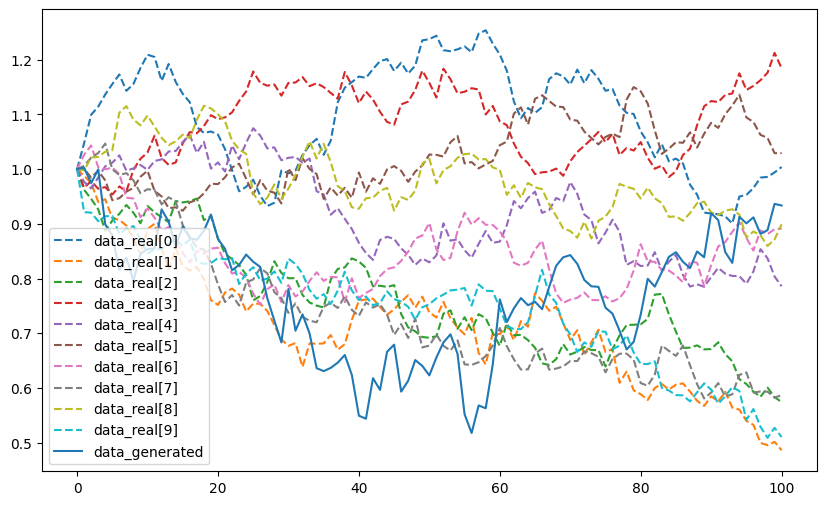

In [129]:
data_real = x[0:10, 0, :]
data_generated =  X[:, 0].detach().numpy()

plt.figure(figsize=(10, 6))
for i in range(data_real.shape[0]):
    plt.plot(data_real[i], label=f'data_real[{i}]', linestyle="--")
    
plt.plot(data_generated, label='data_generated')
plt.legend()
plt.show() 

In [58]:
import random
batch_idx = random.randint(0, 19999)
time_idx = random.randint(0,90)

In [59]:
batch_idx

12576

In [60]:
time_idx

58

In [61]:
start_X=torch.tensor(x[batch_idx,:,time_idx], dtype=torch.float).reshape((1,9))

In [57]:
start_X

tensor([[1.0216, 1.4714, 1.9868, 1.0437, 2.1652, 3.9474, 1.5032, 2.0297, 2.9235]],
       grad_fn=<ToCopyBackward0>)

In [63]:
count=0 

for i in range(1,11): 
    sigma=get_sigma_hat(times, time_ptr, obs_idx, 0.01, 0.1, X, start_X, n_obs_ot,i) 
    print(i, is_pd(sigma), min(np.linalg.eigvals(sigma)), max(np.linalg.eigvals(sigma)))


1 False -0.00028791453 0.05435294
2 True 0.0001836539 0.05274425
3 False -0.0002992118 0.053720027
4 True 0.00018829353 0.054460187
5 False -0.00029005585 0.055442303
6 True 0.00020227808 0.05325982
7 False -0.000286868 0.05422924
8 True 0.00019814768 0.055789884
9 False -0.0002892917 0.056791723
10 True 0.00019406062 0.05709827


In [66]:
N=1000 
counts=np.zeros(10)
min_eigenvalues=np.full(10, np.inf)

for _ in range(N):
    batch_idx = random.randint(0, 19999)
    time_idx = random.randint(0,90)
    start_X=torch.tensor(x[batch_idx,:,time_idx], dtype=torch.float).reshape((1,9))
    
    for i in range(1, 11):
        sigma = get_sigma_hat(times, time_ptr, obs_idx, 0.01, 0.1, X, start_X, n_obs_ot, i)
        pd = is_pd(sigma)
        eigenvalues = np.linalg.eigvals(sigma)

        if pd:
            counts[i-1] += 1
        min_eigenvalues[i-1] = min(min_eigenvalues[i-1], np.min(eigenvalues))
percentage=counts/N*100

In [67]:
for i in range(10):
    print(f"Step {i+1}:")
    print(f"  Positive Definite Percentage: {percentage[i]}%")
    print(f"  Minimum Eigenvalue: {min_eigenvalues[i]}")


Step 1:
  Positive Definite Percentage: 0.0%
  Minimum Eigenvalue: -0.0004220842383801937
Step 2:
  Positive Definite Percentage: 52.400000000000006%
  Minimum Eigenvalue: -5.482573760673404e-05
Step 3:
  Positive Definite Percentage: 0.0%
  Minimum Eigenvalue: -0.0004264510644134134
Step 4:
  Positive Definite Percentage: 52.800000000000004%
  Minimum Eigenvalue: -5.4529387853108346e-05
Step 5:
  Positive Definite Percentage: 0.0%
  Minimum Eigenvalue: -0.0004306554328650236
Step 6:
  Positive Definite Percentage: 53.800000000000004%
  Minimum Eigenvalue: -5.543185761780478e-05
Step 7:
  Positive Definite Percentage: 0.0%
  Minimum Eigenvalue: -0.0004359594313427806
Step 8:
  Positive Definite Percentage: 53.7%
  Minimum Eigenvalue: -5.4336127504939213e-05
Step 9:
  Positive Definite Percentage: 0.0%
  Minimum Eigenvalue: -0.0004404570790939033
Step 10:
  Positive Definite Percentage: 51.4%
  Minimum Eigenvalue: -6.135518196970224e-05


In [123]:
start_X=torch.tensor(x[batch_idx,:,time_idx], dtype=torch.float).reshape((1,9))

In [124]:
start_X

tensor([[0.9137, 1.3866, 1.8187, 0.8348, 1.9228, 3.3075, 1.2669, 1.6617, 2.5218]])

In [125]:
X=torch.tensor(x[batch_idx,:,:time_idx],dtype=torch.float)

In [128]:
time_idx

10

In [127]:
X.shape

torch.Size([9, 10])

In [130]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
 def get_mu_hat(times, time_ptr, obs_idx, delta_t, T, X, start_X, n_obs_ot,i):
    """
    Calculate the drift (mu_hat) estimate.
    :param times: see forward
    :param time_ptr: see forward
    :param obs_idx: see forward
    :param delta_t: see forward
    :param T: see forward
    :param X: see forward
    :param start_X: see forward
    :param n_obs_ot: see forward
    :param d: dimension of the process
    :return: mu_hat estimate
    """
    input_size=start_X.size()[1]
    d=int((-3+np.sqrt(9+8*input_size))/2)
    njode = model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)
    njode_pred = njode["pred"]
    njode_time = njode["pred_t"]
    mu_hat = (njode_pred[-i, :, :d] - start_X[:, :d]) / delta_t
    return mu_hat

In [73]:
def get_sigma_hat(times, time_ptr, obs_idx, delta_t, T, X, start_X, n_obs_ot,i):
    """
    Calculate the diffusion (sigma_hat) estimate.
    :param times: see forward
    :param time_ptr: see forward
    :param obs_idx: see forward
    :param delta_t: see forward
    :param T: see forward
    :param X: see forward
    :param start_X: see forward
    :param n_obs_ot: see forward
    :param d: dimension of the process
    :return: sigma_hat estimate
    """
    input_size=start_X.size()[1]
    d=int((-3+np.sqrt(9+8*input_size))/2)
    X0 = start_X[:, :d]
    njode = model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)
    njode_pred = njode["pred"]
    njode_time = njode["pred_t"]
    sig1 = (construct_matrix(njode_pred[-i, :], d) - construct_matrix(start_X, d)) / delta_t
    mu_hat = get_mu_hat(times, time_ptr, obs_idx, delta_t, T, X, start_X, n_obs_ot,i)
    sig2 = X0.T @ mu_hat + mu_hat.T @ X0
    return (sig1 - sig2).detach().numpy()

In [31]:
 def construct_matrix( output, d):
    """
    Construct a matrix from the input tensor output.
    :param output: input tensor
    :param d: dimension of the process
    :return: constructed matrix
    """
    XX = torch.zeros((d, d), dtype=output.dtype)

    for i in range(d):
        XX[i, i] = output[:, d + i]

    index = 2 * d
    for i in range(d):
        for j in range(i + 1, d):
            XX[i, j] = output[:, index]
            XX[j, i] = output[:, index]
            index += 1

    return XX

In [29]:
def is_pd(matrix):
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False